In [59]:
#importing all the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





In [61]:
#storing file on which data analysis will be performed
file="startup_funding.csv"

In [62]:
#reading csv format file
dataframe=pd.read_csv(file)

In [63]:
# data cleaning required throughout the project I have done it at once:

#cleaning city location:
dataframe["CityLocation"]=dataframe.CityLocation.apply(lambda x: (str(x).title()))
def f(a):
    a=a.split("/")
    a=a[0].strip()
    if "Delhi" in a:
        return "New Delhi"
    return a   

dataframe["CityLocation"]=dataframe.CityLocation.apply(f)

# cleaning investment type name column 
dataframe["InvestmentType"]=dataframe.InvestmentType.apply(lambda x: str(x).title())
dataframe["InvestmentType"]=dataframe.InvestmentType.replace("Seedfunding","Seed Funding")
dataframe["InvestmentType"]=dataframe.InvestmentType.replace("Privateequity","Private Equity")

# cleaning startup name  column
dataframe["StartupName"]=dataframe.StartupName.apply(lambda x: str(x).title().strip())
dataframe.StartupName.replace("Flipkart.com","Flipkart",inplace=True)
dataframe.StartupName.replace("Flipkart.Com","Flipkart",inplace=True)
dataframe.StartupName.replace("Ola Cabs","Ola",inplace=True)
dataframe.StartupName.replace("Olacabs","Ola",inplace=True)
dataframe.StartupName.replace("Oyo Rooms","Oyo",inplace=True)
dataframe.StartupName.replace("OYO ROOMS","Oyo",inplace=True)
dataframe.StartupName.replace("Oyorooms","Oyo",inplace=True)
dataframe.StartupName.replace("Paytm Marketplace","Paytm",inplace=True)
dataframe.AmountInUSD.dropna(inplace=True)



# Question1
# location where maximum startups are funded

# Question statement:
Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.



maximum no. of startup funding is in: NCR 
with total startup fundings counting to 709


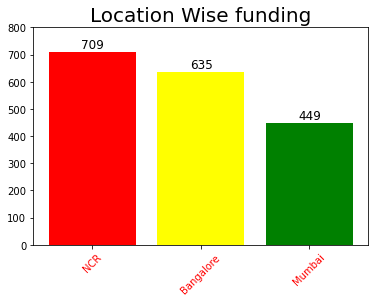

In [64]:
data=dataframe.copy()

data=data[(data.CityLocation=="Bangalore")|
       (data.CityLocation=="Gurgaon")|
       (data.CityLocation=="Noida")|
       (data.CityLocation=="New Delhi")|
       (data.CityLocation=="Mumbai")
      ]
def f(a):
    if a=="Gurgaon" or a=="Noida" or a=="New Delhi":
        return "NCR"
    return a
data["CityLocation"]=data.CityLocation.apply(f)

a=data.CityLocation.value_counts()
print("maximum no. of startup funding is in:",a.index[0],"\nwith total startup fundings counting to",a.values[0]) 

#plotting  the bar graph
label=a.index
val=a.values
c=['red', 'yellow', 'green']
plt.bar(label,val,color=c)
for i in range(len(label)):
    plt.text(i-0.1,val[i]+15,val[i],fontsize=12)
plt.xticks(rotation=45,color="red")
plt.ylim(0,800)
plt.title("Location Wise funding",fontsize=20)
plt.show()

    in order to solve this question I have followed following steps:
    step1)
    copied the dataframe into data local dataframe
    step2)
    we were asked to take only city location Bangalore,Mumbai,NCR so using the boolean indexing in pd dataframe I have narrowed the data with only this location
    step3)
    then in the cities which lie in NCR i have applied the function and convert into NCR
    step4)
    used the value_counts() function and calculated the no. of different locations 
    calculated the maximum printed it 
    step5) 
    plotted a bar graph using the label and values got from previous steps.

# Question 2
# Top 5 investors Name list 
# Question statement)
Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.


Sequoia Capital 64
Accel Partners 54
Kalaari Capital 46
SAIF Partners 42
Blume Ventures 40
Indian Angel Network 40


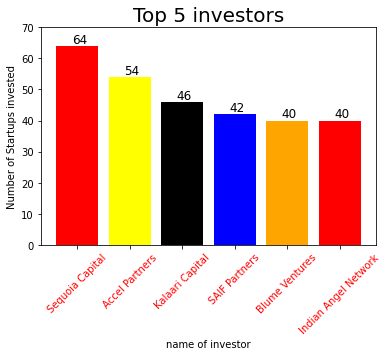

In [69]:
data=dataframe.copy()
data.InvestorsName.dropna(inplace=True)
all_investors=[]
for i in data.InvestorsName:
    i=str(i)
    if "Undisclosed" not in i:
        lst=i.rstrip().split(",")
        lst=[p.strip() for p in lst]
        lst=[k for t in lst for k in t.split(" and ")]
        lst=[k for t in lst for k in t.split(", ")]
        all_investors.extend(lst)
array_of_investors=np.array(all_investors)
array_of_investors=array_of_investors[array_of_investors!=""]
unique_investors,times=np.unique(array_of_investors,return_counts=True)
ind=times.argsort()
ind=ind[::-1]
unique_investors=unique_investors[ind]
times=times[ind]
# I am taking 6 bcs a tie in between the two of the investor counts
for i in range(6):
    print(unique_investors[i],times[i])
# ploting a bar graph
label=unique_investors[:6]
height=times[:6]
c=['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(label,height,color=c)
plt.xticks(rotation=45,color="red")
for i in range(len(label)):
    plt.text(i-0.1,height[i]+1,height[i],fontsize=12)
plt.xlabel("name of investor")
plt.ylabel("Number of Startups invested")
plt.ylim(0,70)
plt.title("Top 5 investors",fontsize=20)
plt.show()


In order to do this question I have followed following steps:
step1)
droped all the null values using dropna() function of library pandas
step2)
I created a empty list 
itereated through the investor name column 
applied splitting using (and and ,)
appended the split list into the list
step3)
used unique function and got the unique startup and returned value counts 
step4)
used the numpy argsort  to sort the above np arrays 
and get the index
step5)
presented 5  data points with maximum values using py plot


# Question 3
# Top 5 investors Name list investing in different startups
# Question statement)
After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital
Accel Partners
Indian Angel Network
Kalaari Capital
Blume Ventures


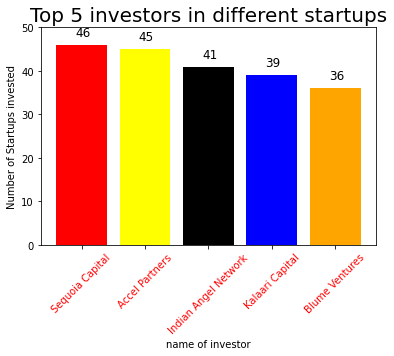

In [70]:
data=dataframe.copy()
d=data.groupby("StartupName")
at=d.groups
un_invstr=[]
for t in at:
    dat=d.get_group(t).copy()
    dat["InvestorsName"]=dat.InvestorsName.apply(lambda x: str(x).title())
    all_investors=[]
    for i in dat.InvestorsName:
        if "Undisclosed" not in i:
            lst=i.rstrip().split(",")
            lst=[p.strip() for p in lst]
            lst=[k for t in lst for k in t.split(" and ")]
            lst=[k for t in lst for k in t.split(", ")]
            all_investors.extend(lst)
    array_of_investor=np.array(all_investors)
    array_of_investors=array_of_investor[array_of_investor.astype(str)!=""]
    unique_investors,times=np.unique(array_of_investors,return_counts=True)
    lis=unique_investors.tolist()
    un_invstr.extend(lis)
    
un_invstr=np.array(un_invstr)
unique_investors,times=np.unique(un_invstr,return_counts=True)
ind=times.argsort()
ind=ind[::-1]
unique=unique_investors[ind]
times=times[ind]
for i in range(5):
    print(unique[i]);

# ploting a bar graph
label=unique[:5]
height=times[:5]
c=['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(label,height,color=c)
plt.xticks(rotation=45,color="red")
plt.title("Top 5 investors in different startups",fontsize=20)
for i in range(len(label)):
    plt.text(i-0.1,height[i]+2,height[i],fontsize=12)
plt.ylim(0,50)
plt.xlabel("name of investor")
plt.ylabel("Number of Startups invested")
plt.show()

in order to solve this I have followed these steps:
step1)
used groupby() function and split the dataframe on basis of the startup name 
iterated throught the groups list and collected the name of unique investor as describesd above

then collected unique investor list and appended to the main list
step2)collected the unique name from the main list and collected teh no. of times they occured
step3)
plot the graph



# Question 4
# Top 5 investors Name list investing for type CrowdFunding and Seed Funding
# Question Statement)
Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network
Rajan Anandan
Group Of Angel Investors
Anupam Mittal
Letsventure


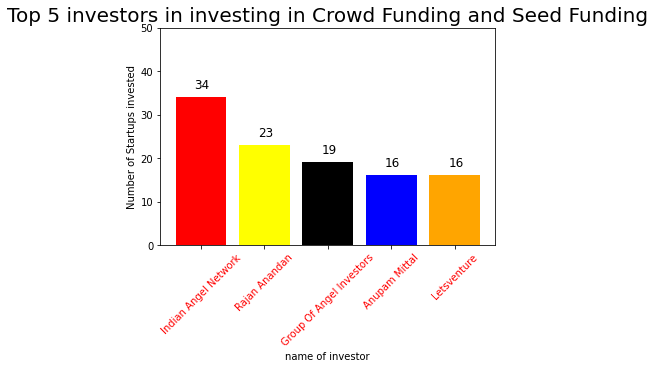

In [71]:
data=dataframe.copy()
data=data[(data.InvestmentType=="Crowdfunding") | (data.InvestmentType=="Seed Funding")]
d=data.groupby("StartupName")
at=d.groups
un_invstr=[]
for t in at:
    dat=d.get_group(t).copy()
    dat["InvestorsName"]=dat.InvestorsName.apply(lambda x: str(x).title())
    all_investors=[]
    for i in dat.InvestorsName:
        if "Undisclosed" not in i:
            lst=i.rstrip().split(",")
            lst=[p.strip() for p in lst]
            lst=[k for t in lst for k in t.split(" and ")]
            lst=[k for t in lst for k in t.split(", ")]
            all_investors.extend(lst)
    array_of_investor=np.array(all_investors)
    array_of_investors=array_of_investor[array_of_investor.astype(str)!=""]
    unique_investors,times=np.unique(array_of_investors,return_counts=True)
    lis=unique_investors.tolist()
    un_invstr.extend(lis)
un_invstr=np.array(un_invstr)
unique_investors,times=np.unique(un_invstr,return_counts=True)
ind=times.argsort()
ind=ind[::-1]
unique=unique_investors[ind]
times=times[ind]
for i in range(5):
    print(unique[i]);

# ploting a bar graph
label=unique[:5]
height=times[:5]
c=['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(label,height,color=c)
plt.xticks(rotation=45,color="red")
plt.title("Top 5 investors in investing in Crowd Funding and Seed Funding",fontsize=20)
for i in range(len(label)):
    plt.text(i-0.1,height[i]+2,height[i],fontsize=12)
plt.xlabel("name of investor")
plt.ylim(0,50)
plt.ylabel("Number of Startups invested")
plt.show()

    in order to do this question I have followed the following steps:
    step1)
    just used boolean indexing and  got the rows from the dataframe where investment_type was just "Crowd Funding" amd "Seed Funding"
    step2)
    used previous steps to get the list of top 5 investors invested in different startups
    step3)
    plot the bar graph

# Question 5
# Top 5 investors Name list investing for type Private Equity
# Question Statement:
Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital
Accel Partners
Kalaari Capital
Blume Ventures
Saif Partners


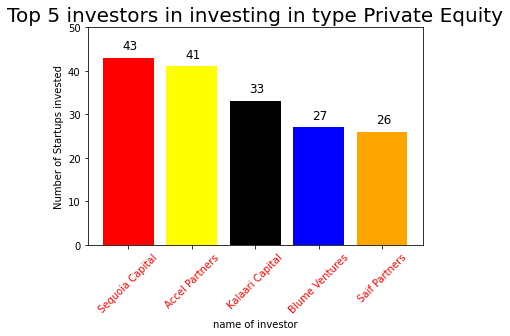

In [72]:
data=dataframe.copy()
data=data[(data.InvestmentType=="Private Equity")]
d=data.groupby("StartupName")
at=d.groups
un_invstr=[]
for t in at:
    dat=d.get_group(t).copy()
    dat["InvestorsName"]=dat.InvestorsName.apply(lambda x: str(x).title())
    all_investors=[]
    for i in dat.InvestorsName:
        if "Undisclosed" not in i:
                lst=i.rstrip().split(",")
                lst=[p.strip() for p in lst]
                lst=[k for t in lst for k in t.split(" and ")]
                lst=[k for t in lst for k in t.split(", ")]
                all_investors.extend(lst)
    array_of_investor=np.array(all_investors)
    array_of_investors=array_of_investor[array_of_investor.astype(str)!=""]
    unique_investors,times=np.unique(array_of_investors,return_counts=True)
    lis=unique_investors.tolist()
    un_invstr.extend(lis)
un_invstr=np.array(un_invstr)
unique_investors,times=np.unique(un_invstr,return_counts=True)
ind=times.argsort()
ind=ind[::-1]
unique=unique_investors[ind]
times=times[ind]
for i in range(5):
    print(unique[i]);
    
# ploting a bar graph
label=unique[:5]
height=times[:5]
c=['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(label,height,color=c)
plt.xticks(rotation=45,color="red")
plt.title("Top 5 investors in investing in type Private Equity",fontsize=20)
plt.ylim(0,50)
plt.xlabel("name of investor")
for i in range(len(label)):
    plt.text(i-0.1,height[i]+2,height[i],fontsize=12)
plt.ylabel("Number of Startups invested")
plt.show()

    in order to do this question I have followed the following steps:
    step1)
    just used boolean indexing and  got the rows from the dataframe where investment_type was just "Private equity"
    step2)
    used previous steps to get the list of top 5 investors invested in different startups
    step3)
    plot the bar graph